# EDA-анализ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Загрузка данных
df = pd.read_csv("dataset.csv")

print("Пропущенные значения:\n", df.isnull().sum())

#Заполнение пропущенных значений
df.fillna(0, inplace=True)

Пропущенные значения:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [3]:
# 3. Описательная статистика
print("\nОписательная статистика:")
print(df.describe())


Описательная статистика:
          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.47

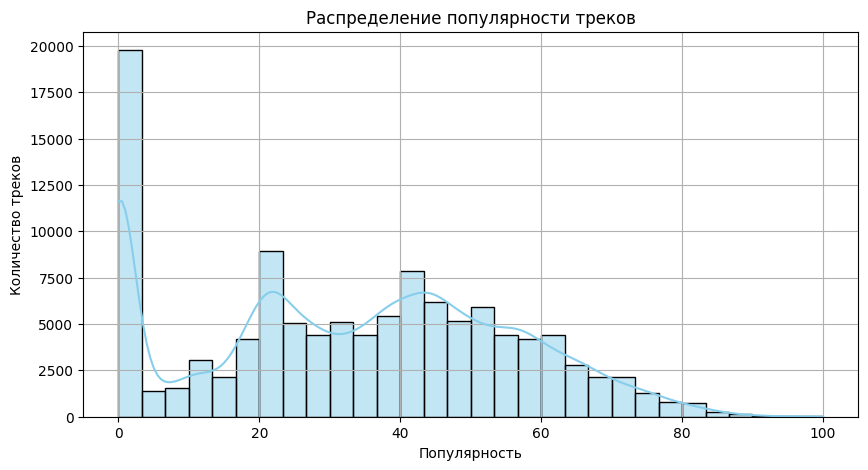

In [4]:
# 4. Распределение популярности треков
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Распределение популярности треков")
plt.xlabel("Популярность")
plt.ylabel("Количество треков")
plt.grid(True)
plt.show()

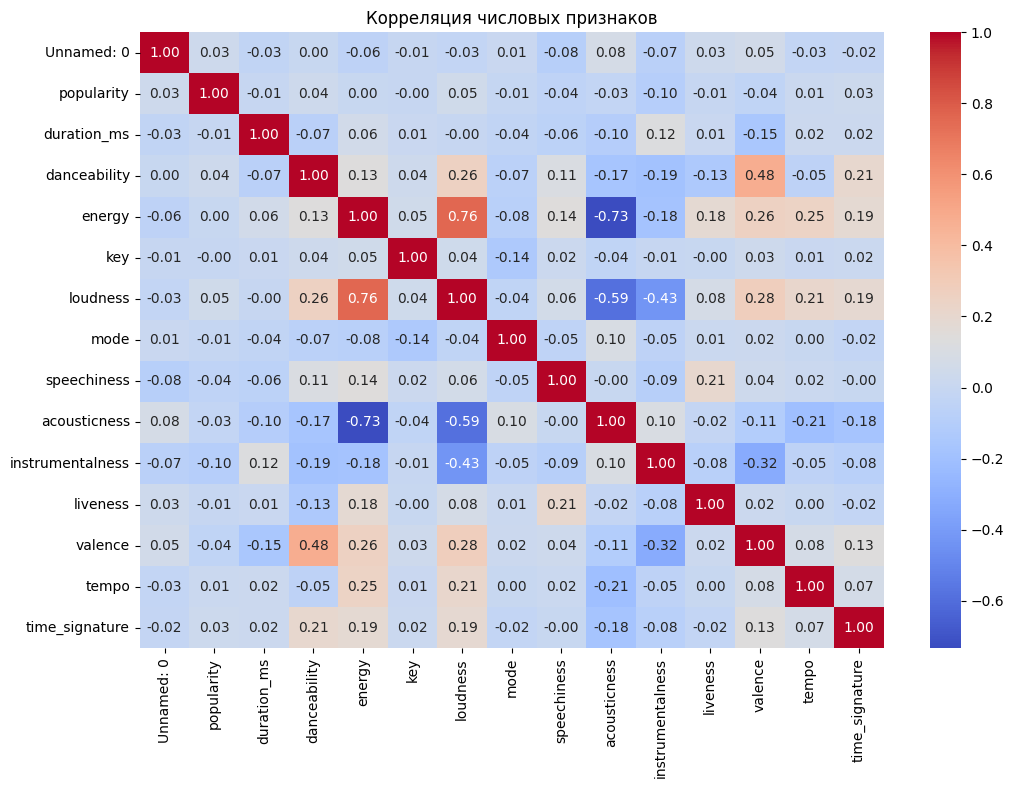

In [5]:
#5 Корреляция числовых признаков
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция числовых признаков")
plt.show()

C:\Users\Тимофей\AppData\Local\Temp\ipykernel_14608\826900241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


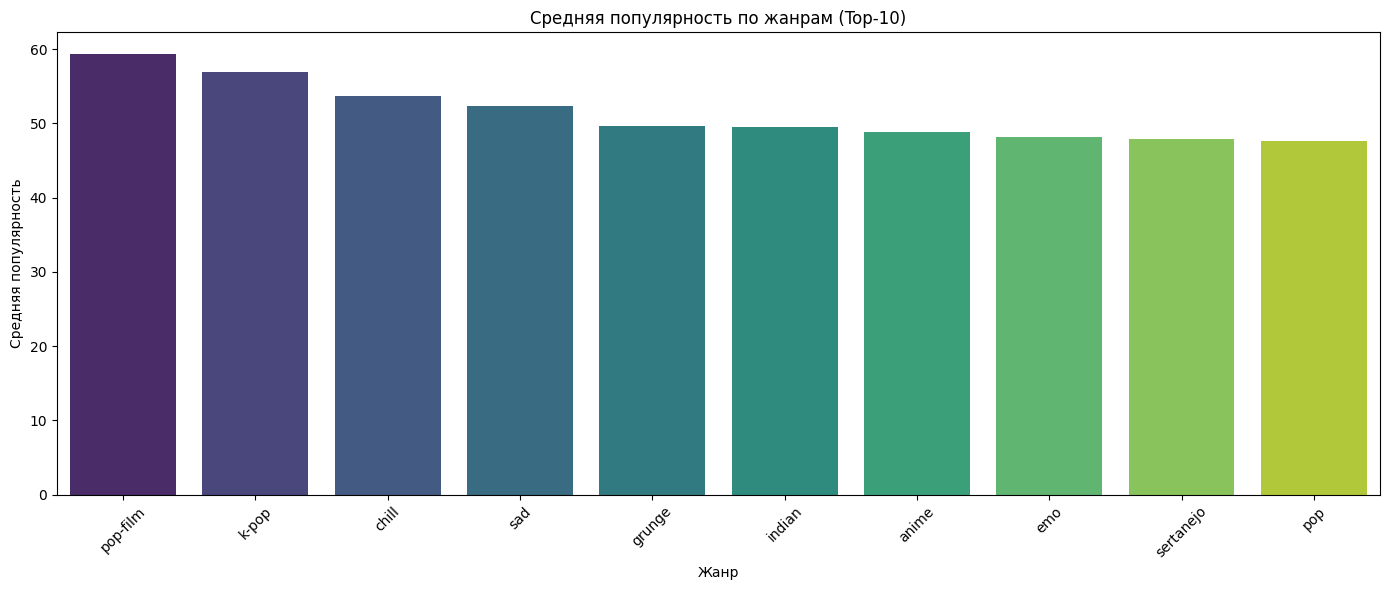

In [6]:
#6 Средняя популярность по жанрам
plt.figure(figsize=(14, 6))
genre_popularity = df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title("Средняя популярность по жанрам (Top-10)")
plt.xlabel("Жанр")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

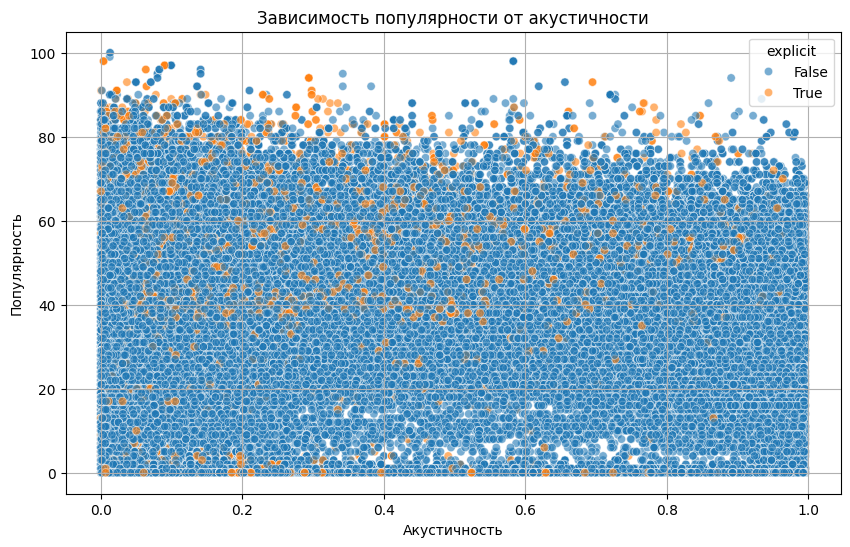

In [7]:
#7 Влияние акустичности на популярность
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="acousticness", y="popularity", hue="explicit", alpha=0.6)
plt.title("Зависимость популярности от акустичности")
plt.xlabel("Акустичность")
plt.ylabel("Популярность")
plt.grid(True)
plt.show()

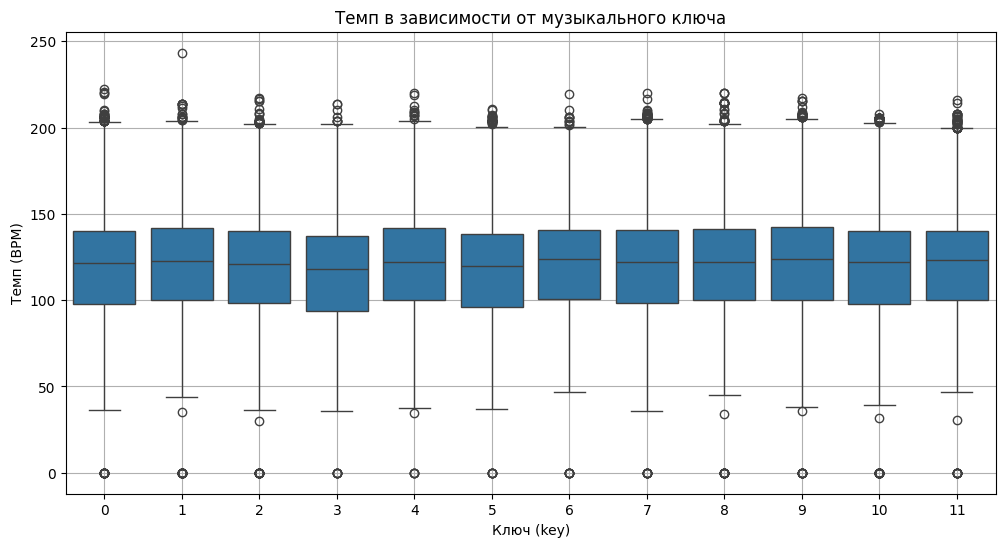

In [8]:
#8 Выборки по ключу и темпу
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="key", y="tempo")
plt.title("Темп в зависимости от музыкального ключа")
plt.xlabel("Ключ (key)")
plt.ylabel("Темп (BPM)")
plt.grid(True)
plt.show()

# Feature Engineering

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

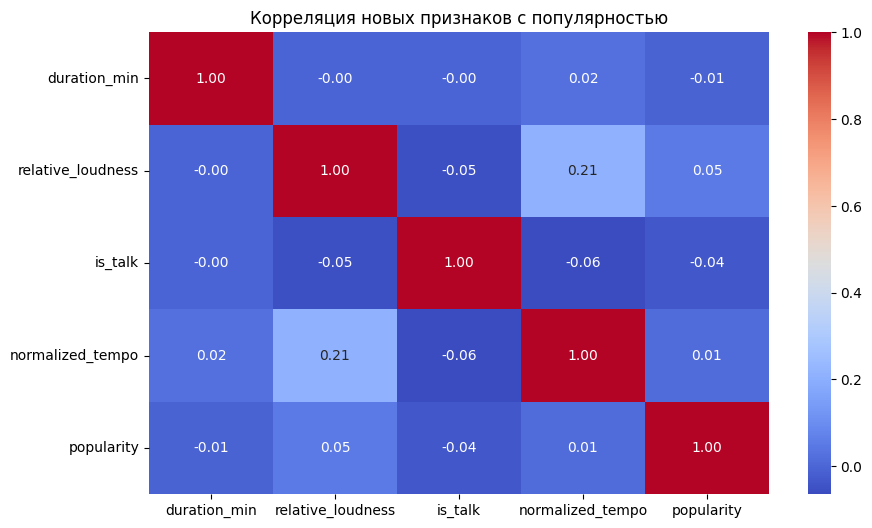

C:\Users\Тимофей\AppData\Local\Temp\ipykernel_14608\1778240820.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances['importance'], palette='viridis')


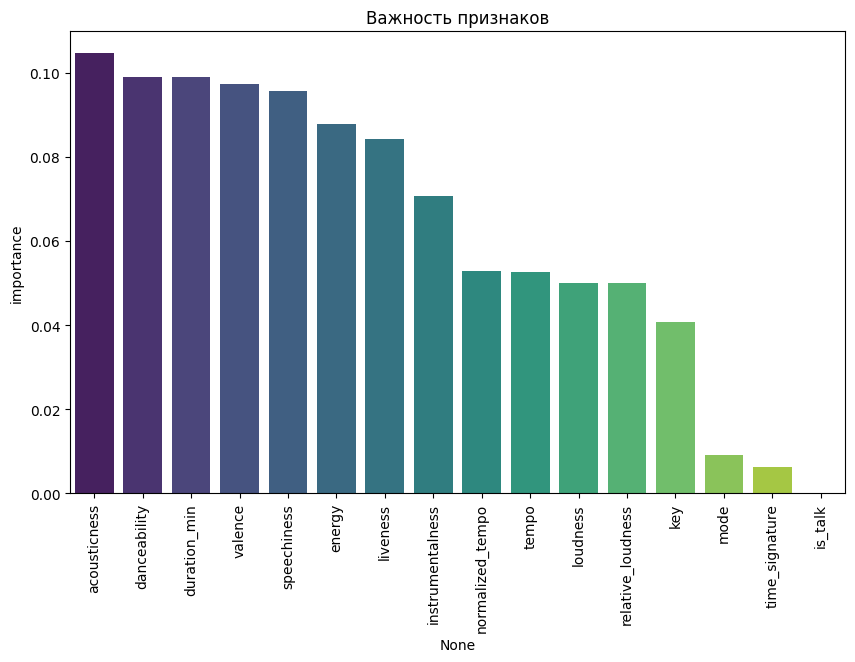

RMSE модели линейной регрессии: 21.98


In [10]:
# Длительность трека в минутах
df['duration_min'] = df['duration_ms'] / 60000

# Относительная громкость
df['relative_loudness'] = df['loudness'] - df['loudness'].min()

# Состояние
df['is_talk'] = df['speechiness'] > 0.66

# Нормированый темп
df['normalized_tempo'] = (df['tempo'] - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())

# Корреляция
new_features = ['duration_min', 'relative_loudness', 'is_talk', 'normalized_tempo']
corr_matrix = df[new_features + ['popularity']].corr()

# Визуализация корреляции новых признаков с целевым показателем
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция новых признаков с популярностью")
plt.show()

# Важность признаков с помощью Random Forest
X = df[['duration_min', 'relative_loudness', 'is_talk', 'normalized_tempo', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity']

# Разбиение: данные → обучающая выборка + тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Важность признаков
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], palette='viridis')
plt.title("Важность признаков")
plt.xticks(rotation=90)
plt.show()

# 4. Построение простой модели линейная регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Прогнозирование на тетовой выборке
y_pred = lr.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE модели линейной регрессии: {rmse:.2f}")

# Эксперименты

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import time
numeric_features = ['duration_min', 'relative_loudness', 'normalized_tempo',
                  'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence',
                  'tempo']
categorical_features = ['key', 'mode', 'time_signature', 'is_talk']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## Линейная модель машинного обучения

Ridge Regression:
RMSE: 21.96
R²: 0.02
Время обучения: 0.1 сек



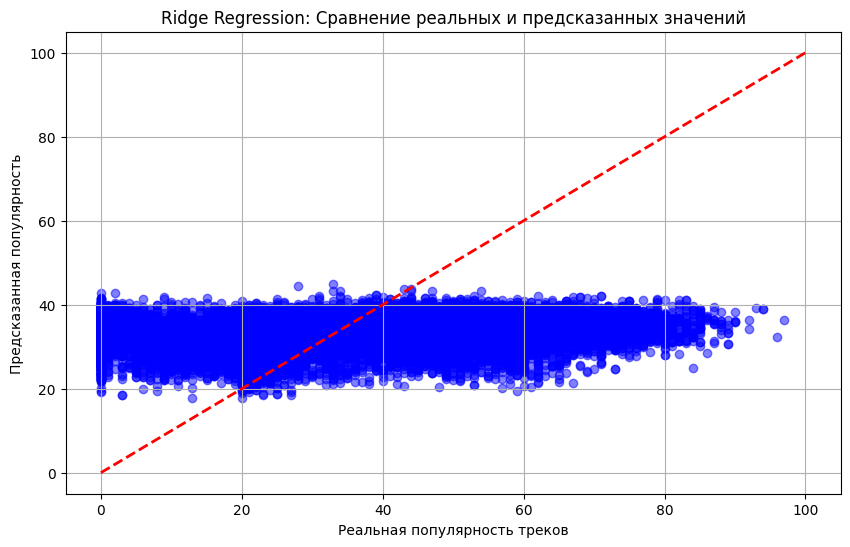

In [12]:
# Создание и обучение модели
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0, random_state=42))
])

start_time = time.time()
ridge_model.fit(X_train, y_train)
ridge_time = time.time() - start_time

# Предсказание и оценка
ridge_pred = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression:")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²: {ridge_r2:.2f}")
print(f"Время обучения: {ridge_time:.1f} сек\n")

# График сравнения реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Ridge Regression: Сравнение реальных и предсказанных значений')
plt.xlabel('Реальная популярность треков')
plt.ylabel('Предсказанная популярность')
plt.grid(True)

## Деревья

Decision Tree:
RMSE: 21.70
R²: 0.05
Время обучения: 0.5 сек



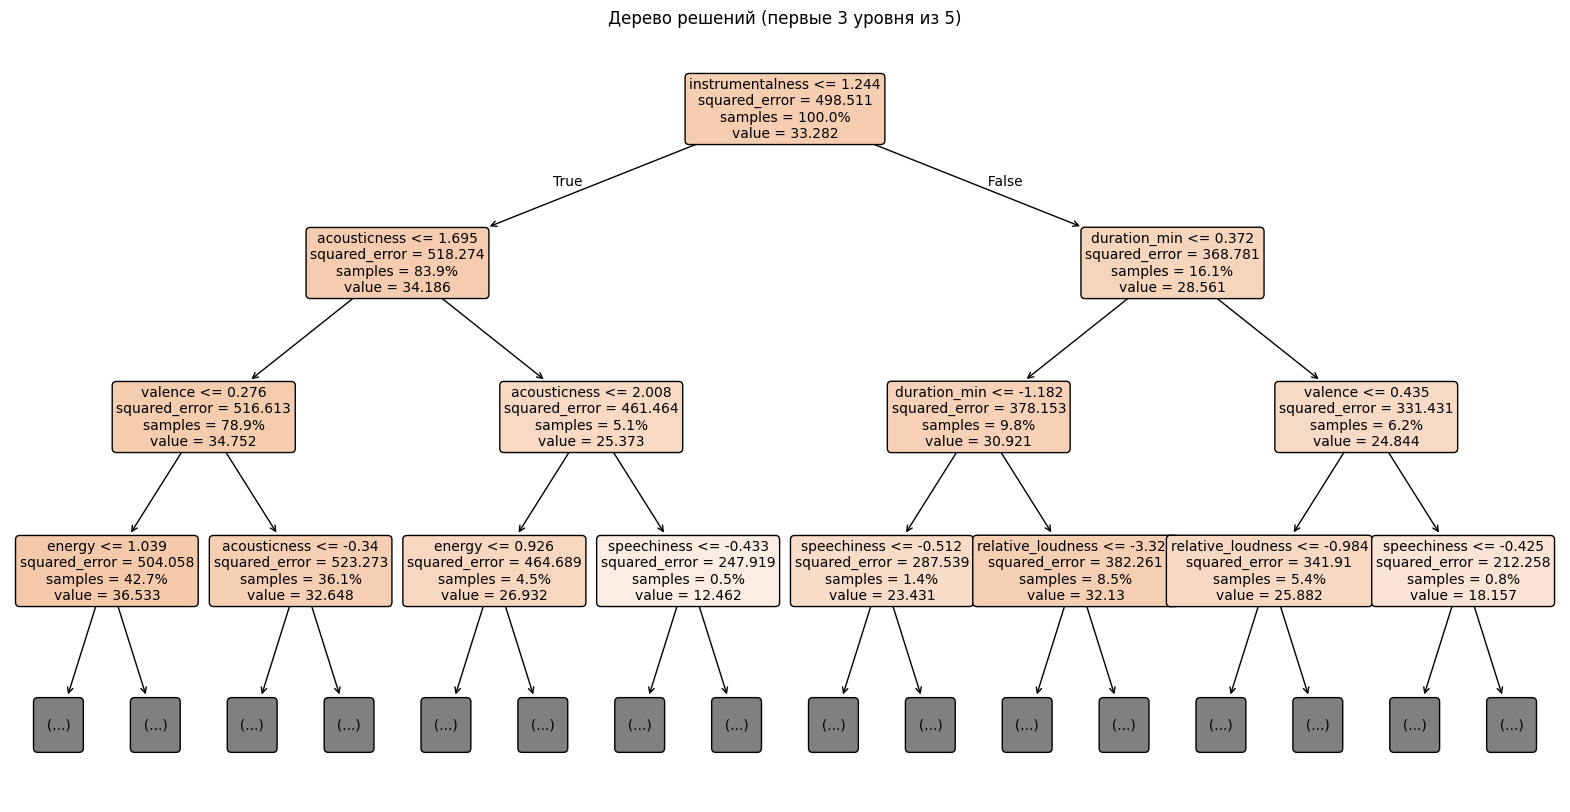

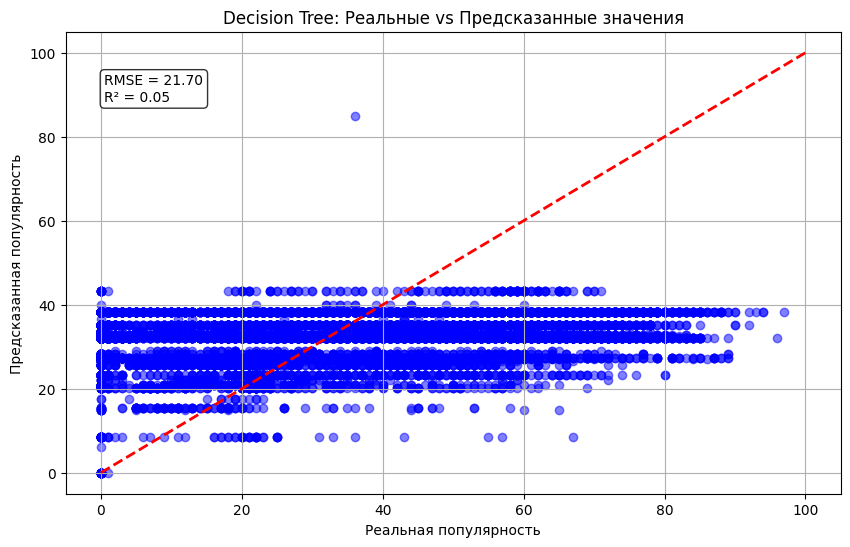

In [18]:
# Создание и обучение модели
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
])

start_time = time.time()
tree_model.fit(X_train, y_train)
tree_time = time.time() - start_time

# Предсказание и оценка
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_r2 = r2_score(y_test, tree_pred)

print("Decision Tree:")
print(f"RMSE: {tree_rmse:.2f}")
print(f"R²: {tree_r2:.2f}")
print(f"Время обучения: {tree_time:.1f} сек\n")

# 1. Визуализация дерева решений (первые 3 уровня)
plt.figure(figsize=(20, 10))
plot_tree(tree_model.named_steps['model'], 
          feature_names=numeric_features + list(tree_model.named_steps['preprocessor']
                        .named_transformers_['cat']
                        .get_feature_names_out(categorical_features)),
          filled=True, 
          rounded=True,
          max_depth=3,  
          fontsize=10,
          proportion=True)
plt.title("Дерево решений (первые 3 уровня из 5)")
plt.show()

# 2. График реальных vs предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tree_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Decision Tree: Реальные vs Предсказанные значения')
plt.xlabel('Реальная популярность')
plt.ylabel('Предсказанная популярность')
plt.grid(True)

plt.annotate(f'RMSE = {tree_rmse:.2f}\nR² = {tree_r2:.2f}', 
             xy=(0.05, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

## Градиентный бустинг

XGBoost:
RMSE: 21.22
R²: 0.09
Время обучения: 0.3 сек



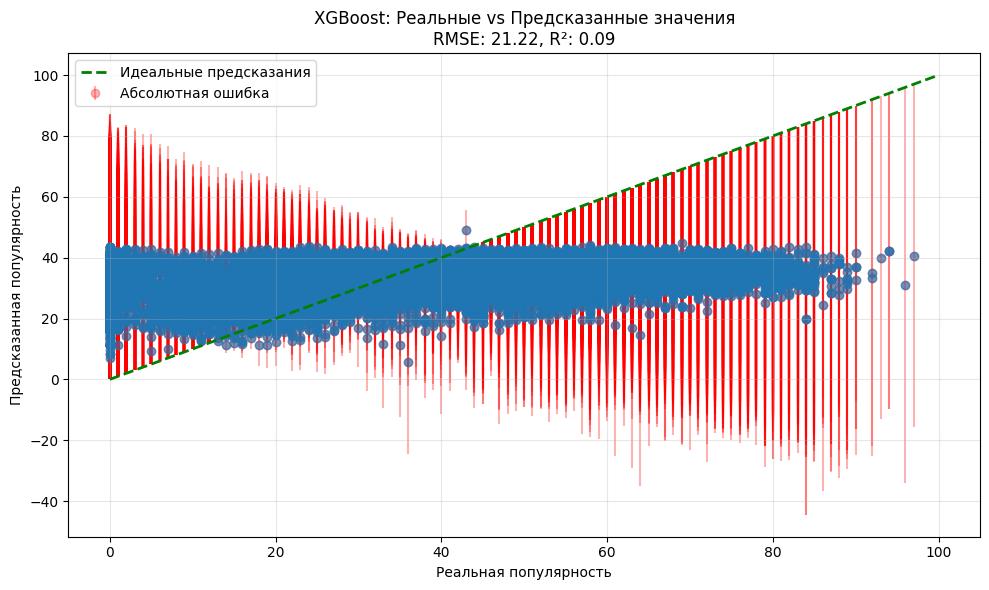

## Нейронная сеть

Neural Network:
RMSE: 20.60
R²: 0.14
Время обучения: 9.6 сек



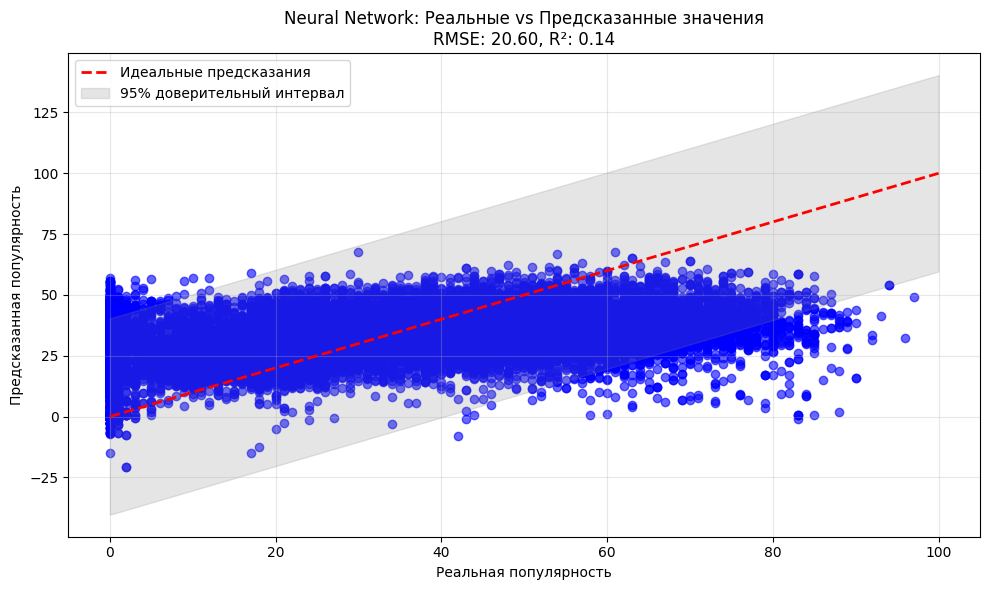

## Сравнение моделей

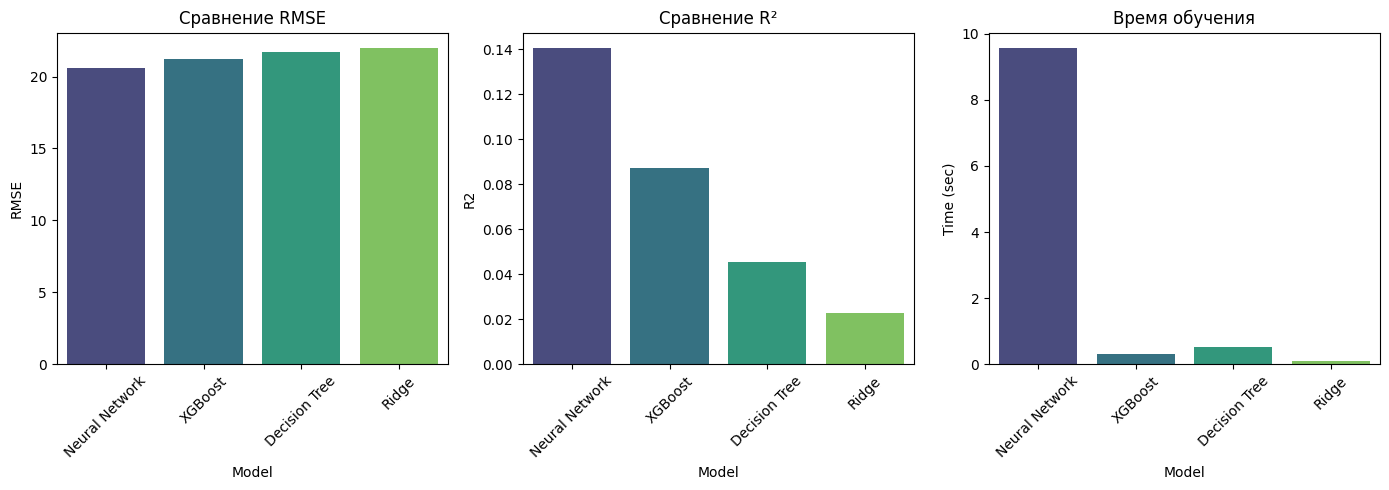


Лучшая модель: Neural Network
RMSE: 20.60
R²: 0.14
Время обучения: 9.6 сек

Кросс-валидация для Neural Network...
RMSE (кросс-валидация): 20.71 ± 0.15
R² (кросс-валидация): 0.14 ± 0.01
